SINGLE TASK XG BOOST

In [6]:
import xgboost as xgb

# Load data
dtrain = xgb.DMatrix('train.data')
dval = xgb.DMatrix('val.data')

# Specify parameters
params = {
    'max_depth': 9,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "min_child_weight": 1,
    "gamma": 0.48,
    "subsample": 1,
    "colsample_bytree": 0.7,
    "nthread": 8,
    "scale_pos_weight": 1,
    
}

# Specify validation set for early stopping
eval_list = [(dval, 'eval'), (dtrain, 'train')]

# Train model
num_round = 1000  # Number of training rounds
bst = xgb.train(params, dtrain, num_round, eval_list, early_stopping_rounds=100)


/home/user/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-auc:0.65180	train-auc:0.95232
[1]	eval-auc:0.67806	train-auc:0.97182
[2]	eval-auc:0.68969	train-auc:0.97782
[3]	eval-auc:0.69357	train-auc:0.98063
[4]	eval-auc:0.69482	train-auc:0.98421
[5]	eval-auc:0.69666	train-auc:0.98552
[6]	eval-auc:0.69542	train-auc:0.98591
[7]	eval-auc:0.70055	train-auc:0.98723
[8]	eval-auc:0.71167	train-auc:0.98901
[9]	eval-auc:0.71111	train-auc:0.98873
[10]	eval-auc:0.71589	train-auc:0.98950
[11]	eval-auc:0.71580	train-auc:0.98957
[12]	eval-auc:0.71228	train-auc:0.98993
[13]	eval-auc:0.71387	train-auc:0.99125
[14]	eval-auc:0.71473	train-auc:0.99227
[15]	eval-auc:0.71480	train-auc:0.99277
[16]	eval-auc:0.71549	train-auc:0.99273
[17]	eval-auc:0.71536	train-auc:0.99300
[18]	eval-auc:0.71671	train-auc:0.99401
[19]	eval-auc:0.71505	train-auc:0.99412
[20]	eval-auc:0.71468	train-auc:0.99492
[21]	eval-auc:0.71490	train-auc:0.99535
[22]	eval-auc:0.71762	train-auc:0.99578
[23]	eval-auc:0.71788	train-auc:0.99628
[24]	eval-auc:0.71836	train-auc:0.99683
[25]	eval-

AUC: 0.7389412194231473
F1 Score: 0.703971119133574


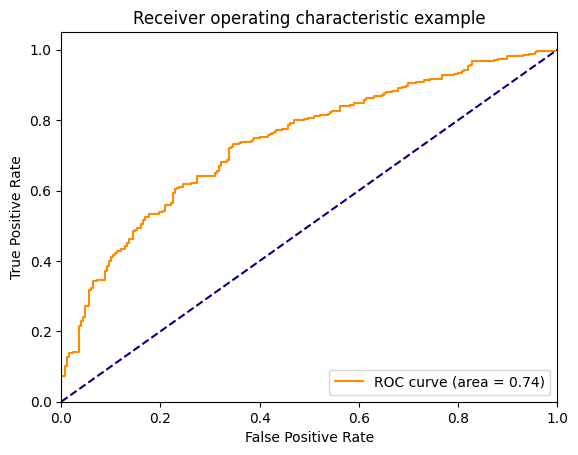

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np

# Assume your validation labels are in a 1-D numpy array named y_val
# y_val = np.array([...])

# predict probabilities

y_pred_proba = bst.predict(dval)
# Convert predicted probabilities to class labels
y_pred_labels = (y_pred_proba > 0.5).astype(int)
# Get true labels from dval
y_val = dval.get_label()

# Calculate F1 score
f1 = f1_score(y_val, y_pred_labels)


# calculate AUC
y_val = dval.get_label()
auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {auc}")
print(f"F1 Score: {f1}")

# To plot ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()